# Support Vector Regression(SVR):
**A Support Vector Machine (SVM) is a supervised machine learning algorithm used for classification and regression tasks. SVM works by finding a hyperplane in a high-dimensional space that best separates data into different classes. It aims to maximize the margin (the distance between the hyperplane and the nearest data points of each class) while minimizing classification errors. SVM can handle both linear and non-linear classification problems by using various kernel functions. It’s widely used in tasks such as image classification, text categorization, and more.**







## SVR Building Step

**Importing the Libraries**

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

**Importing dataset**

In [3]:
df=pd.read_csv('Position_Salaries.csv')

In [4]:
print(df.isna().sum())
print('Size of dataset:',df.shape)

Position    0
Level       0
Salary      0
dtype: int64
Size of dataset: (10, 3)


In [5]:
print(df.head())

            Position  Level  Salary
0   Business Analyst      1   45000
1  Junior Consultant      2   50000
2  Senior Consultant      3   60000
3            Manager      4   80000
4    Country Manager      5  110000


In [6]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Level,10.0,5.5,3.027650,1.0,3.25,5.5,7.75,10.0
Salary,10.0,249500.0,299373.883668,45000.0,65000.00,130000.0,275000.00,1000000.0


In [7]:
x=df.iloc[:,1:2].values
y=df.iloc[:,-1].values

In [8]:
x

array([[ 1],
       [ 2],
       [ 3],
       [ 4],
       [ 5],
       [ 6],
       [ 7],
       [ 8],
       [ 9],
       [10]], dtype=int64)

In [9]:
y

array([  45000,   50000,   60000,   80000,  110000,  150000,  200000,
        300000,  500000, 1000000], dtype=int64)

Above we can see X is in 2-D array and Y in 1-D array.
So, first convert the Y into 2-D array

In [10]:
y=y.reshape(len(y),1)

In [11]:
y

array([[  45000],
       [  50000],
       [  60000],
       [  80000],
       [ 110000],
       [ 150000],
       [ 200000],
       [ 300000],
       [ 500000],
       [1000000]], dtype=int64)

**Feature scaling**

In [12]:
from sklearn.preprocessing import StandardScaler
sc_x=StandardScaler()
x=sc_x.fit_transform(x)

sc_y=StandardScaler()
y=sc_y.fit_transform(y)

In [13]:
x

array([[-1.5666989 ],
       [-1.21854359],
       [-0.87038828],
       [-0.52223297],
       [-0.17407766],
       [ 0.17407766],
       [ 0.52223297],
       [ 0.87038828],
       [ 1.21854359],
       [ 1.5666989 ]])

In [14]:
y

array([[-0.72004253],
       [-0.70243757],
       [-0.66722767],
       [-0.59680786],
       [-0.49117815],
       [-0.35033854],
       [-0.17428902],
       [ 0.17781001],
       [ 0.88200808],
       [ 2.64250325]])

**Training the SVR model on the whole dataset**

In [15]:
from sklearn.svm import SVR
regressor=SVR(kernel='rbf')  #RBF:-Gaussian Radial basic function

regressor.fit(x,y)

C:\Users\rajes\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVR()

**predicting a new result in SVR**

In [27]:
sc_y.inverse_transform(regressor.predict(sc_x.transform([[6.5]])).reshape(-1,1))


array([[170370.0204065]])

**Visualising the SVR model**

In [17]:
x_inverse=sc_x.inverse_transform(x)
y_inverse=sc_y.inverse_transform(y)

y_pred_inverse=sc_y.inverse_transform(regressor.predict(x).reshape(-1,1))

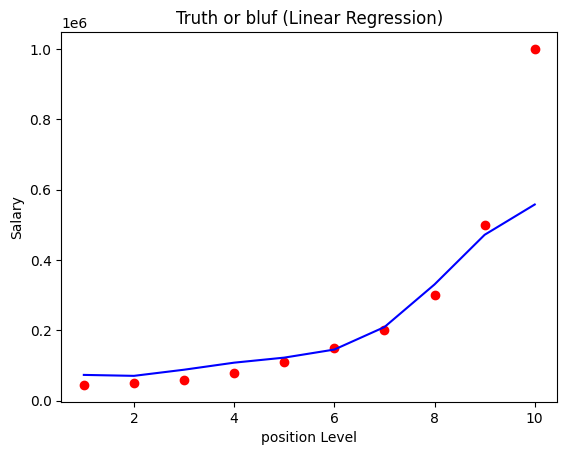

In [18]:
plt.scatter(x_inverse,y_inverse,color='r')
plt.plot(x_inverse,y_pred_inverse,color='b')
plt.xlabel("position Level")
plt.ylabel("Salary")
plt.title("Truth or bluf (Linear Regression)")
plt.show()

In [33]:
# x_grid=np.arange(min(x_inverse),max(x_inverse),0.1)
# x_grid=x_grid.reshape((len(x_grid),1))
# y_pred_inverse=sc_y.inverse_transform(regressor.predict(x_grid).reshape(-1,1))
# plt.scatter(x_inverse,y_inverse,color='r')
# plt.plot(x_grid,y_pred_inverse,color='b')
# plt.show()